<a href="https://colab.research.google.com/github/abhi10010/Image-Classification/blob/master/FlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
n = []
while 1:
  n.append('1')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive

/content/drive


In [4]:
cd 'My Drive'

/content/drive/My Drive


In [5]:
cd 'Colab Notebooks'/

/content/drive/My Drive/Colab Notebooks


In [6]:
ls

FlowerClassification.ipynb  flowers/  Playground.ipynb


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [9]:
import cv2

data = "flowers/"
folders = os.listdir(data)
print(folders)

image_names = []
train_labels = []
train_images = []

size = 64,64

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            train_images.append(im)
        else:
            continue

['tulip', 'sunflower', 'daisy', 'dandelion', 'rose']


In [10]:
tfms = get_transforms(do_flip=False)
data1 = ImageDataBunch.from_lists(image_names, labels=train_labels, ds_tfms=tfms, size=224, bs=bs).normalize(imagenet_stats)
data1.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

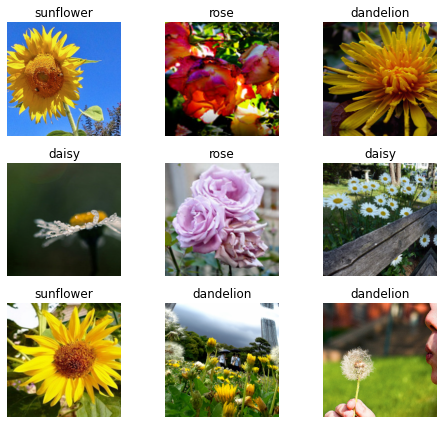

In [11]:
data1.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data1.classes)
len(data1.classes),data1.c

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


(5, 5)

In [13]:
learn = cnn_learner(data1, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.763241,0.352611,0.092379,18:26
1,0.493789,0.284689,0.079677,18:39
2,0.310780,0.227175,0.070439,18:37
3,0.223084,0.224157,0.071594,18:39


In [0]:
learn.save('stage-1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

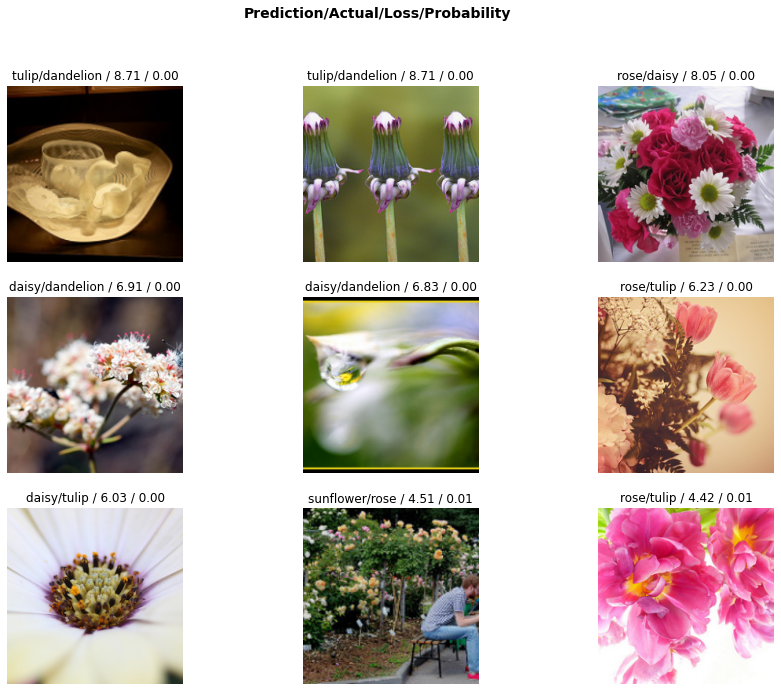

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

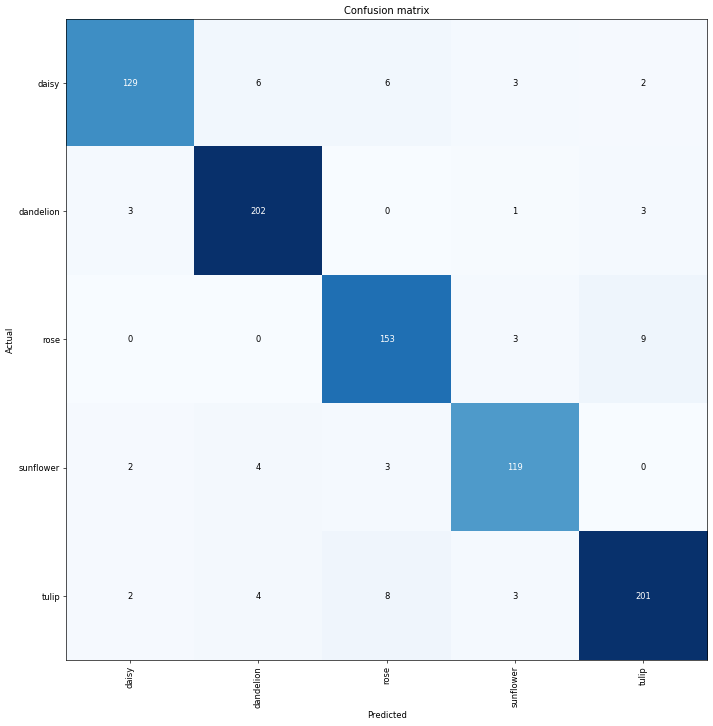

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (3467 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tulip,tulip,tulip,tulip,tulip
Path: /kaggle/input/flower-recognition/flowers;

Valid: LabelList (866 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dandelion,tulip,sunflower,sunflower,tulip
Path: /kaggle/input/flower-recognition/flowers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


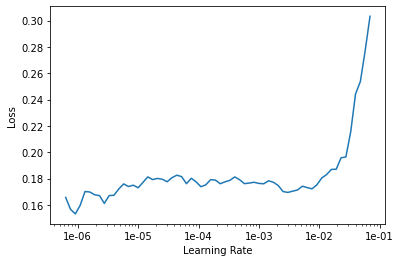

In [22]:
learn.recorder.plot()

In [23]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.174899,0.213788,0.061201,24:42
1,0.163600,0.200531,0.058891,24:38
2,0.129529,0.197326,0.056582,24:42
3,0.110584,0.194424,0.055427,24:35
4,0.105802,0.195168,0.053118,24:39


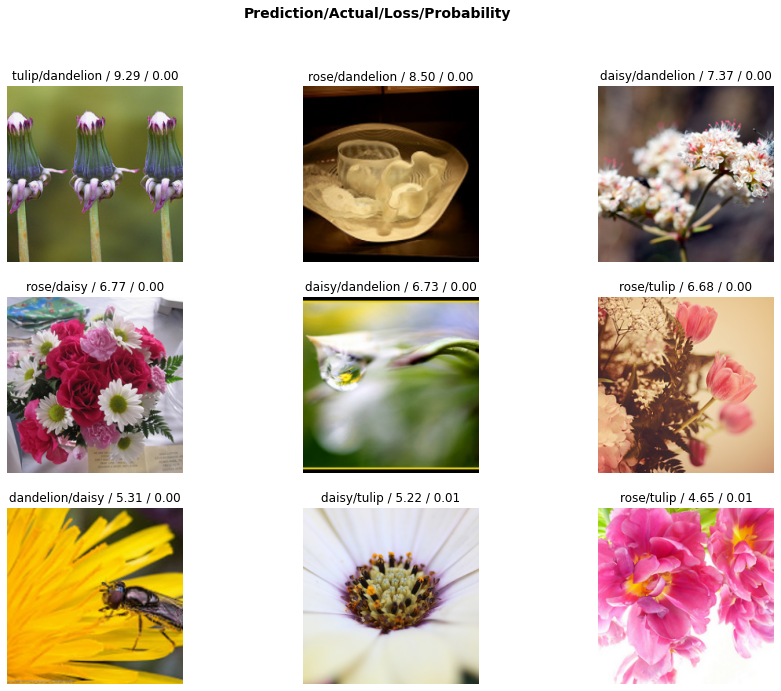

In [24]:
learn.save('stage-1')

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

interp.plot_top_losses(9, figsize=(15,11))

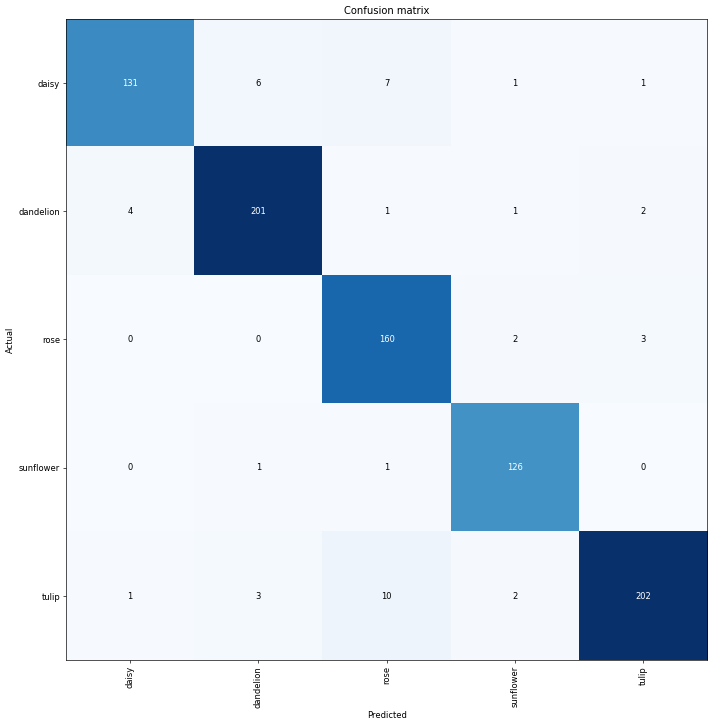

In [25]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)